# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing data

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#change genre to gender
df['Gender']=df['Genre']

In [4]:
df=df.drop('Genre', axis=1)

In [5]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,Male
1,2,21,15,81,Male
2,3,20,16,6,Female
3,4,23,16,77,Female
4,5,31,17,40,Female


In [6]:
#change column order
df=df[['CustomerID','Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X=df[['Spending Score (1-100)','Annual Income (k$)',]].values

In [9]:
corr = df.drop('CustomerID', axis=1).corr(numeric_only=True)
corr.style.background_gradient(cmap='BuPu')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


### Scatterplot

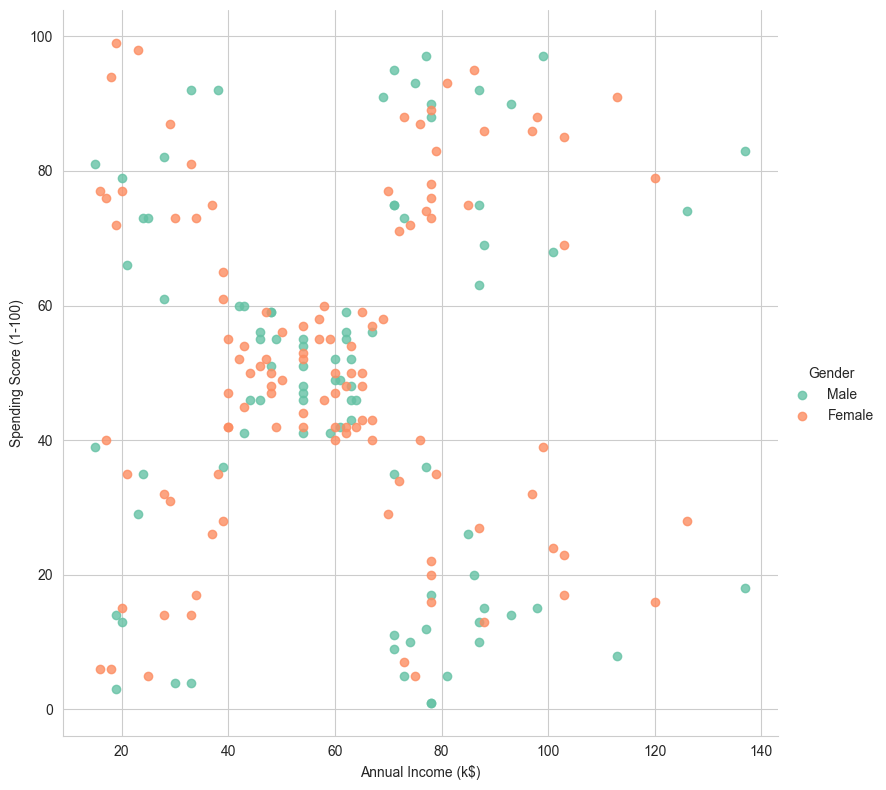

In [10]:
sns.set_style('whitegrid')
# Create the lmplot
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender',
           palette='Set2', height=8, aspect=1, fit_reg=False)


### Elbow Method

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



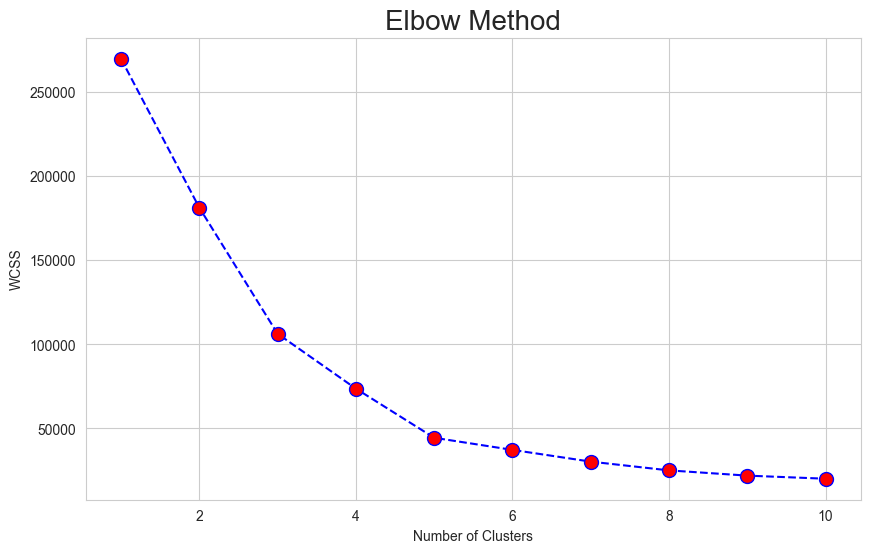

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# optimum number of clusters: 5

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [15]:
#output: clusters to which customers belong
#Customer 1 belongs to cluster 2
#Customer 2 belongs to cluster 3......

print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


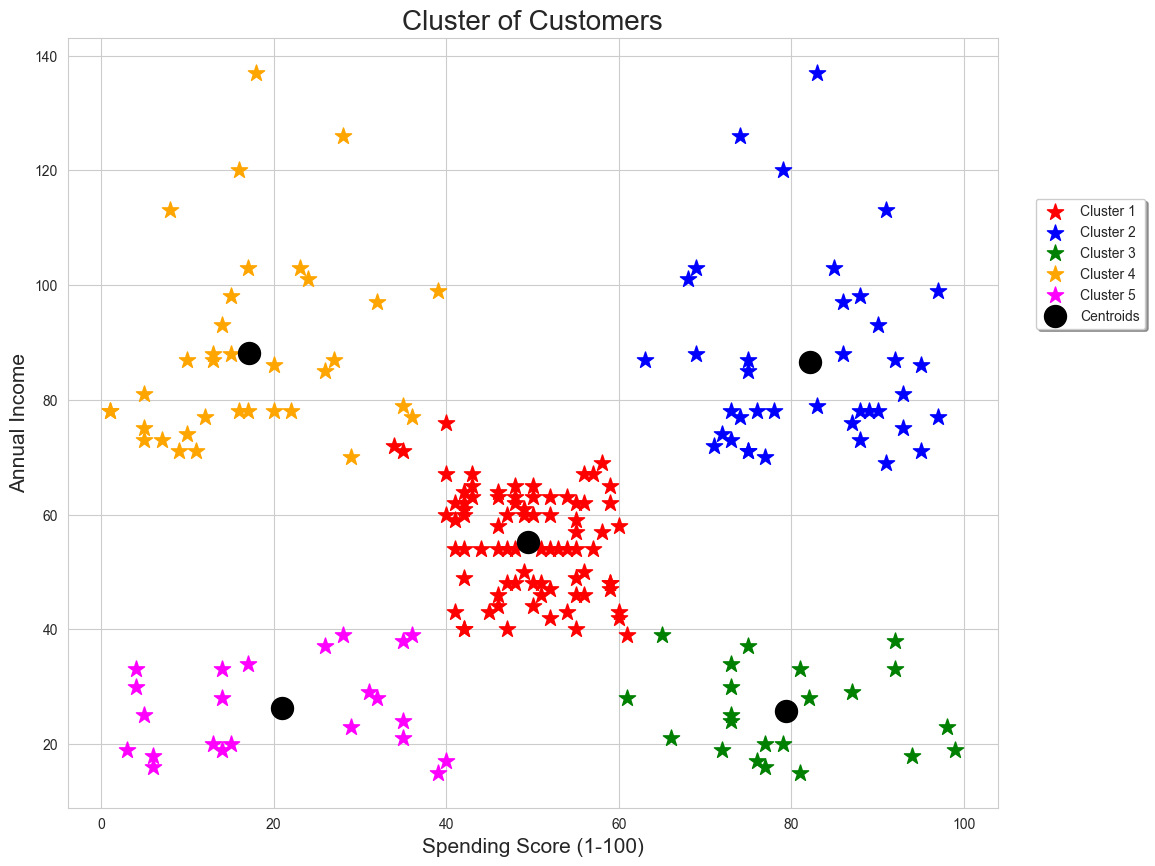

In [16]:
#Plot the clusters
X = np.array(X)
fig=plt.figure(figsize=(12,10))

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=150, marker='*', c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=150,marker='*', c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=150, marker='*',c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=150,marker='*', c='orange', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=150,marker='*' ,c='magenta', label='Cluster 5')

#centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250,c='black',marker="o", label='Centroids')

plt.title('Cluster of Customers', size= 20)
plt.xlabel('Spending Score (1-100)', size=15)
plt.ylabel('Annual Income', size=15)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)



plt.show()

# Deriving possible marketing strategies and conclusion

In summary, we have 5 different clusters (red, blue, green, orange, magenta) and the respective centroids (black).

Cluster 5 (magenta): People with a low income and a low spending score

Cluster 3 (green): Customers with a high spending score and a low annual income

Cluster 4 (gold): People with a low spending score and a high income

Cluster 2 (blue): Individuals with a high spending score and a high annual income

Cluster 1 (red): "average" spending score and "average" annual income

Given this information, the next step is to find out how certain customers can be approached and how a proper marketing strategy can be developed."